In [1]:
import pandas as pd
import seaborn as sns
import scipy
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score,classification_report
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from imblearn.over_sampling import ADASYN, RandomOverSampler
import xgboost as xgb
import numpy as np
from catboost import CatBoostClassifier
from sklearn.manifold import TSNE
from pycaret.classification import *

In [2]:
df_train = pd.read_hdf("../input/train_taiwan.h5")
df_test = pd.read_hdf("../input/test_taiwan.h5")

df_all = pd.concat([df_train, df_test]).reset_index(drop=True)

df_train.shape, df_test.shape, df_all.shape

((3409, 97), (3410, 96), (6819, 97))

In [3]:
df_all.head()

,target,ROA(C) before tax and interest before depreciation,ROA(A) after tax and before interest%,"ROA(B) after tax and before interest, before depreciation",Operating gross profit margin,Already Realized gross profit margin of sales,Operating profit rate,Net profit margin before tax,Net profit margin after tax,Non-industry revenue and expenditure/revenue,Continuous profit rate (after tax),Business Expense rate,Research and development expense ratio,Cash flow ratio,Interest-bearing debt interest rate,Tax rate (A),Book value per share (B),Book value per share (A),Book value per share (C),Persistent EPS in the last four seasons,Cash flow per share,Turnover per share (RMB),Operating profit per share (RMB),Net profit per share before tax (Yuan),Realized sales gross profit growth rate,Operating profit growth rate,After-tax net profit growth rate,Regular net profit growth rate,Permanent net profit growth rate,Total assets growth rate,Net worth growth rate,Return on total assets growth rate,Cash reinvestment %,Current ratio,Quick ratio,Interest expense ratio,Total debt/total net worth,Debt Ratio%,net value/asset,long-term fund suitability ratio (A),borrowing dependency,contingent liabilities/net value,operating profit/paid-in capital,pre-tax net profit/real income Capital,Inventory and accounts receivable/net value,Total asset turnover,Accounts receivable turnover,Average collection days,Inventory turnover rate (times),Fixed asset turnover Times,Net worth turnover rate (times),Revenue per person,Operating profit per person,Equipment rate per person,working capital to total assets,Quick asset/Total asset,current assets/total assets,Cash / total assets,Quick asset/current liabilities,cash / current liability,current liability to assets,operating funds to liability,Inventory/working capital,Inventory/current liability,Current liability / liability,Working capital/equity,current liability/equity,lo ng-term liability to current assets,Retained Earnings/Total assets,total income / total expense,total expense /assets,current asset turnover rate,quick asset turnover rate,working capitcal Turnover rate,Cash turnover rate,Cash flow to Sales,fix assets to assets,current liability to liability,current liability to equity,equity to long-term liability,Cash flow to total assets,cash flow to liability,CFO to ASSETS,cash flow to equity,current liabilities to current assets,one if total liabilities exceeds total assets zero otherwise,net income to total assets,total assets to GNP price,No-credit interval,Gross profit to Sales,Net income to stockholder's Equity,Liability to equity,Degree of financial leverage (DFL),Interest coverage ratio( Interest expense to EBIT ),one if net income was negative for the last two year zero otherwise,equity to liability,id
0,0.0,0.419636,0.482665,0.467156,0.602524,0.602517,0.998590,0.796922,0.808876,0.303500,0.781095,0.000522,0.000116,0.452926,0.001779,0.000000,0.150478,0.150478,0.150478,0.209038,0.316510,0.002601,0.090709,0.165098,0.023190,0.848099,0.689638,0.689638,0.217621,0.000066,0.000458,0.266434,0.372304,0.068042,0.064306,0.630607,0.000696,0.020830,0.979170,0.041096,0.369637,0.005366,0.090698,0.164656,0.395431,0.040480,0.000454,0.013904,0.000091,0.003216,0.013548,0.011909,0.377230,0.000542,0.963546,0.859055,0.849140,0.713473,0.066085,0.158072,0.023526,0.317034,0.276992,0.005385,0.928746,0.741424,0.326846,0.000000,0.863572,0.002087,0.033382,0.000890,0.000909,0.594480,0.001956,0.671663,0.007238,0.928746,0.326846,0.110933,0.685782,0.503844,0.545797,0.318885,0.004142,0,0.768005,0.000473,0.624668,0.602520,0.838641,0.275284,0.026790,0.565151,1,0.170960,0
1,0.0,0.494613,0.549771,0.543445,0.602091,0.602091,0.998986,0.797405,0.809328,0.303516,0.781588,0.000119,0.000056,0.459113,0.000819,0.082397,0.173149,0.173149,0.173149,0.219911,0.312230,0.052589,0.101376,0.174588,0.022419,0.848212,0.689860,0.689860,0.217646,0.000071,0.000459,0.264625,0.365057,0.009129,0.005370,0.631718,0.008838,0.145539,0.854461,0.005988,0.372533,0.005

In [19]:
df_test.head()

,ROA(C) before tax and interest before depreciation,ROA(A) after tax and before interest%,"ROA(B) after tax and before interest, before depreciation",Operating gross profit margin,Already Realized gross profit margin of sales,Operating profit rate,Net profit margin before tax,Net profit margin after tax,Non-industry revenue and expenditure/revenue,Continuous profit rate (after tax),Business Expense rate,Research and development expense ratio,Cash flow ratio,Interest-bearing debt interest rate,Tax rate (A),Book value per share (B),Book value per share (A),Book value per share (C),Persistent EPS in the last four seasons,Cash flow per share,Turnover per share (RMB),Operating profit per share (RMB),Net profit per share before tax (Yuan),Realized sales gross profit growth rate,Operating profit growth rate,After-tax net profit growth rate,Regular net profit growth rate,Permanent net profit growth rate,Total assets growth rate,Net worth growth rate,Return on total assets growth rate,Cash reinvestment %,Current ratio,Quick ratio,Interest expense ratio,Total debt/total net worth,Debt Ratio%,net value/asset,long-term fund suitability ratio (A),borrowing dependency,contingent liabilities/net value,operating profit/paid-in capital,pre-tax net profit/real income Capital,Inventory and accounts receivable/net value,Total asset turnover,Accounts receivable turnover,Average collection days,Inventory turnover rate (times),Fixed asset turnover Times,Net worth turnover rate (times),Revenue per person,Operating profit per person,Equipment rate per person,working capital to total assets,Quick asset/Total asset,current assets/total assets,Cash / total assets,Quick asset/current liabilities,cash / current liability,current liability to assets,operating funds to liability,Inventory/working capital,Inventory/current liability,Current liability / liability,Working capital/equity,current liability/equity,lo ng-term liability to current assets,Retained Earnings/Total assets,total income / total expense,total expense /assets,current asset turnover rate,quick asset turnover rate,working capitcal Turnover rate,Cash turnover rate,Cash flow to Sales,fix assets to assets,current liability to liability,current liability to equity,equity to long-term liability,Cash flow to total assets,cash flow to liability,CFO to ASSETS,cash flow to equity,current liabilities to current assets,one if total liabilities exceeds total assets zero otherwise,net income to total assets,total assets to GNP price,No-credit interval,Gross profit to Sales,Net income to stockholder's Equity,Liability to equity,Degree of financial leverage (DFL),Interest coverage ratio( Interest expense to EBIT ),one if net income was negative for the last two year zero otherwise,equity to liability,id
0,0.518354,0.587767,0.573746,0.597861,0.597861,0.998988,0.797525,0.809438,0.303722,0.781705,0.000049,0.000012,0.464786,0.000290,0.042616,0.200371,0.200371,0.200371,0.243831,0.325034,0.046947,0.101132,0.194547,0.022076,0.847997,0.689348,0.689348,0.217588,0.000072,0.000468,0.263738,0.380910,0.006504,0.006407,0.630785,0.007416,0.132539,0.867461,0.006425,0.373219,0.005366,0.101137,0.193515,0.400613,0.149925,0.000783,0.008075,0.001056,0.000649,0.038226,0.052642,0.396712,0.010154,0.758464,0.341842,0.343936,0.029491,0.006323,0.001588,0.098314,0.347850,0.277257,0.000823,0.700415,0.732510,0.330877,0.010421,0.946941,0.002790,0.009369,0.000087,0.000093,0.593920,0.000022,0.671573,0.111008,0.700415,0.330877,0.117099,0.644352,0.459547,0.595563,0.314807,0.044334,0,0.826656,0.002734,0.623801,0.597856,0.842617,0.280157,0.026844,0.565399,1,0.027910,1
1,0.527519,0.533199,0.568392,0.599857,0.599857,0.998960,0.797386,0.809313,0.303538,0.781574,0.000110,0.000097,0.469574,0.000179,0.000000,0.190384,0.190384,0.190384,0.215089,0.324291,0.015715,0.095106,0.170219,0.022009,0.847919,0.689140,0.689140,0.217564,0.000062,0.000448,0.263708,0.382316,0.009181,0.008002,0.633089,0.003670,0.084621,0.915379,0.005048,0.372473,0.005366,0.095103,0.

<AxesSubplot:xlabel='target', ylabel='count'>

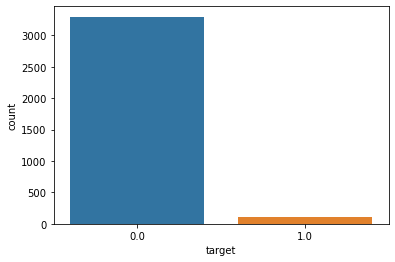

In [4]:
sns.countplot(df_all.target)

<AxesSubplot:>

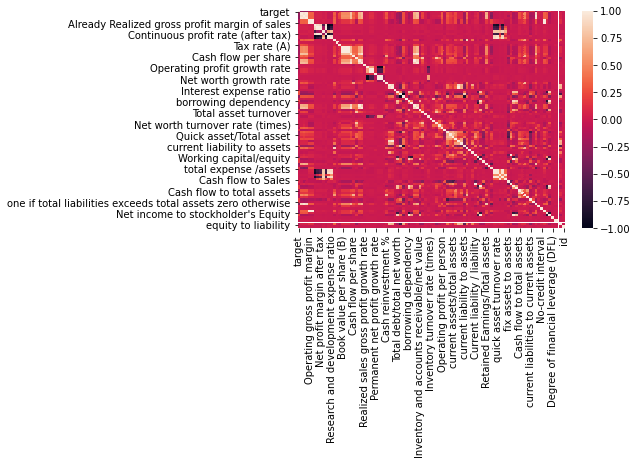

In [39]:
sns.heatmap(df_all.corr())

In [4]:
df_train = df_all[ df_all["target"].notnull() ]
df_test = df_all[ df_all["target"].isnull() ].copy()

In [33]:
X = df_train.drop(['target','id'],axis=1)
y = df_train.target

In [21]:
ada = ADASYN()
X_ada, y_ada = ada.fit_resample(X,y)

In [24]:
#df_ada = X_ada
#df_ada['target']=y_ada

In [14]:
#clf = setup(data=df_ada, target = 'target', session_id=123)

In [15]:
#compare_models()

<AxesSubplot:xlabel='target', ylabel='count'>

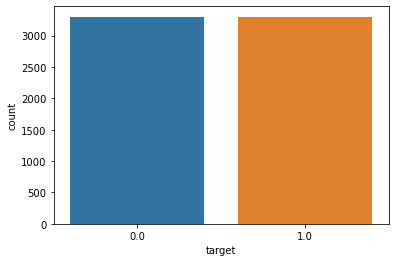

In [7]:
sns.countplot(y_ada)

In [8]:
y_ada.value_counts()

1.0    3300
0.0    3299
Name: target, dtype: int64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_ada,y_ada, test_size=0.3)

In [25]:
xg = xgb.XGBClassifier()
gr_xg = GridSearchCV(xg, {'n_estimators':range(50, 401,50), 'max_depth':range(4,17,2)}, n_jobs=-1, scoring='f1', cv=5)
gr_xg.fit(X_ada, y_ada)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

<AxesSubplot:ylabel='count'>

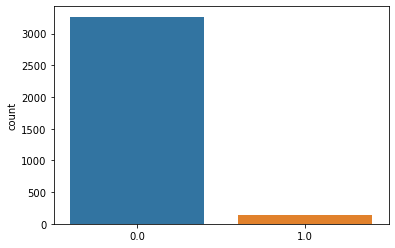

In [27]:
sns.countplot(gr_xg.predict(df_test[list(df_fi.query('fi>0.005').name)]))

In [33]:
y_probas = xg.predict_proba(df_test.drop(['id', 'target'], axis=1))
y_pred = (y_probas[:,1] > 0.1).astype(np.int)

<AxesSubplot:ylabel='count'>

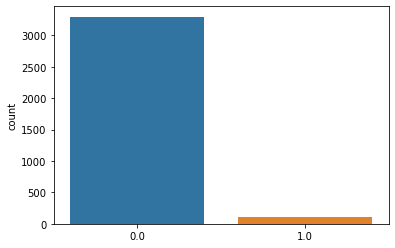

In [12]:
sns.countplot(gr_xg.predict(df_test.drop(['id', 'target'], axis=1)))

{'max_depth': 4, 'n_estimators': 400}

In [16]:
df_fi = pd.DataFrame({'name': X_ada.columns, 'fi': gr_xg.best_estimator_.feature_importances_}).sort_values('fi', ascending=False)

In [18]:
list(df_fi.query('fi>0.005').name)

['Continuous profit rate (after tax)',
 'Persistent EPS in the last four seasons',
 'borrowing dependency',
 "Net income to stockholder's Equity",
 'Total debt/total net worth',
 'Cash flow ratio',
 'ROA(C) before tax and interest before depreciation',
 'Tax rate (A)',
 'Book value per share (B)',
 'Net profit per share before tax (Yuan)',
 'net income to total assets',
 'Already Realized gross profit margin of sales',
 'Non-industry revenue and expenditure/revenue',
 'Degree of financial leverage (DFL)',
 'total income / total expense',
 'Equipment rate per person',
 'lo ng-term liability to current assets',
 'Interest-bearing debt interest rate',
 'Cash reinvestment %',
 'contingent liabilities/net value',
 'Current ratio',
 'Inventory/working capital',
 'Cash flow to total assets',
 'operating profit/paid-in capital',
 'Cash flow per share',
 'cash flow to liability',
 'No-credit interval',
 'Turnover per share (RMB)',
 'current liability to assets',
 'Return on total assets growth 

In [32]:
pd.DataFrame({'id': df_test.id, 'target': gr_xg.predict(df_test.drop(['id', 'target'], axis=1).astype('int64')}).to_csv('gr_xg2.csv', index=False)

In [20]:
df_test.head()

,target,ROA(C) before tax and interest before depreciation,ROA(A) after tax and before interest%,"ROA(B) after tax and before interest, before depreciation",Operating gross profit margin,Already Realized gross profit margin of sales,Operating profit rate,Net profit margin before tax,Net profit margin after tax,Non-industry revenue and expenditure/revenue,...,total assets to GNP price,No-credit interval,Gross profit to Sales,Net income to stockholder's Equity,Liability to equity,Degree of financial leverage (DFL),Interest coverage ratio( Interest expense to EBIT ),one if net income was negative for the last two year zero otherwise,equity to liability,id
3409,NaN,0.518354,0.587767,0.573746,0.597861,0.597861,0.998988,0.797525,0.809438,0.303722,...,0.002734,0.623801,0.597856,0.842617,0.280157,0.026844,0.565399,1,0.027910,1
3410,NaN,0.527519,0.533199,0.568392,0.599857,0.599857,0.998960,0.797386,0.809313,0.303538,...,0.004723,0.623637,0.599854,0.840084,0.277441,0.028609,0.568345,1,0.045304,2
3411,NaN,0.511237,0.559965,0.569142,0.600045,0.600045,0.999018,0.797455,0.809380,0.303536,...,0.003495,0.624501,0.600046,0.841482,0.282363,0.027037,0.566110,1,0.022834,3
3412,NaN,0.507824,0.554187,0.558167,0.608325,0.608397,0.999085,0.797513,0.809401,0.303498,...,0.002541,0.628388,0.608322,0.840981,0.280930,0.026989,0.565954,1,0.025723,5
3413,NaN,0.500853,0.563945,0.550565,0.602027,0.602293,0.998982,0.797503,0.809400,0.303695,...,0.001225,0.623910,0.602027,0.841116,0.277664,0.027067,0.566201,1,0.042682,7
